In [1]:
import zipfile
import os
import shutil
import cv2
import json
import numpy as np
from tqdm import tqdm

In [8]:
zip_path = 'dataset.zip'
extract_to = './dataset'
with zipfile.ZipFile(zip_path , 'r') as zip_ref:
    zip_ref.extractall(extract_to)

KeyboardInterrupt: 

In [2]:
for folder in os.listdir('dataset/dataset'):
    shutil.move(f"dataset/dataset/{folder}" , "dataset/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/dataset'

In [3]:
label_map = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'add': 10, 'sub': 11, 'mul': 12, 'div': 13, 'eq': 14,
        'x': 15, 'y': 16
    }

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

label_map = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
    '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'add': 10, 'sub': 11, 'mul': 12, 'div': 13, 'eq': 14,
    'x': 15, 'y': 16
}

def load_and_split_dataset(dataset_path='datasets/', img_size=64):
    data = []
    labels = []

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if not os.path.isdir(folder_path) or folder_name not in label_map:
            continue

        label = label_map[folder_name]

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0  # Normalize to [0, 1]
                img = img.reshape(img_size, img_size, 1)
                data.append(img)
                labels.append(label)

    data = np.array(data)
    labels = to_categorical(np.array(labels), num_classes=len(label_map))

    return train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)


In [6]:
X_train, X_test, y_train, y_test = load_and_split_dataset(dataset_path='D:/JupyterNotebook/DigitRecognizer/dataset', img_size=64)

In [4]:
import os
print(os.getcwd())


D:\JupyterNotebook\DigitRecognizer


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
model = Sequential()
model.add(Conv2D(64, 3, input_shape=(64, 64, 1), activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))  # 17 classes in label_map

In [17]:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_split=0.1, 
                    verbose=1)

Epoch 1/15
208/208 [==============================] - 453s 2s/step - loss: 2.0293 - accuracy: 0.3411 - val_loss: 1.0362 - val_accuracy: 0.6631
Epoch 2/15
208/208 [==============================] - 432s 2s/step - loss: 0.9735 - accuracy: 0.6917 - val_loss: 0.6044 - val_accuracy: 0.8092
Epoch 3/15
208/208 [==============================] - 501s 2s/step - loss: 0.6651 - accuracy: 0.7863 - val_loss: 0.5110 - val_accuracy: 0.8349
Epoch 4/15
208/208 [==============================] - 519s 2s/step - loss: 0.4627 - accuracy: 0.8502 - val_loss: 0.3762 - val_accuracy: 0.8904
Epoch 5/15
208/208 [==============================] - 529s 3s/step - loss: 0.3489 - accuracy: 0.8848 - val_loss: 0.3668 - val_accuracy: 0.8999
Epoch 6/15
208/208 [==============================] - 644s 3s/step - loss: 0.2796 - accuracy: 0.9063 - val_loss: 0.3305 - val_accuracy: 0.9175
Epoch 7/15
208/208 [==============================] - 557s 3s/step - loss: 0.2129 - accuracy: 0.9325 - val_loss: 0.3772 - val_accuracy: 0.9026

In [19]:
model.save("symbol_classifier_model.h5")


C:\Users\vinay\anaconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OSError: [Errno 22] Unable to synchronously create file (unable to open file: name = 'symbol_classifier_model.h5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [20]:
model.save("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")


In [1]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Reverse label map
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw Symbol")

        self.canvas = tk.Canvas(root, width=300, height=300, bg="white")
        self.canvas.pack()

        self.image = Image.new("L", (300, 300), color=255)
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<B1-Motion>", self.paint)

        tk.Button(root, text="Predict", command=self.predict).pack()
        self.label = tk.Label(root, text="", font=("Helvetica", 20))
        self.label.pack()

        tk.Button(root, text="Clear", command=self.clear).pack()

    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black")
        self.draw.ellipse([x1, y1, x2, y2], fill=0)

    def predict(self):
        img = self.image.resize((64, 64))  # Match your training image size
        img = np.array(img)
        img = img / 255.0
        img = img.reshape(1, 64, 64, 1)
        pred = model.predict(img)
        result = label_map[np.argmax(pred)]
        self.label.config(text=f"Prediction: {result}")

    def clear(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (300, 300), color=255)
        self.draw = ImageDraw.Draw(self.image)
        self.label.config(text="")

root = tk.Tk()
app = DrawingApp(root)
root.mainloop()


1/1 [==============================] - 0s 26ms/step


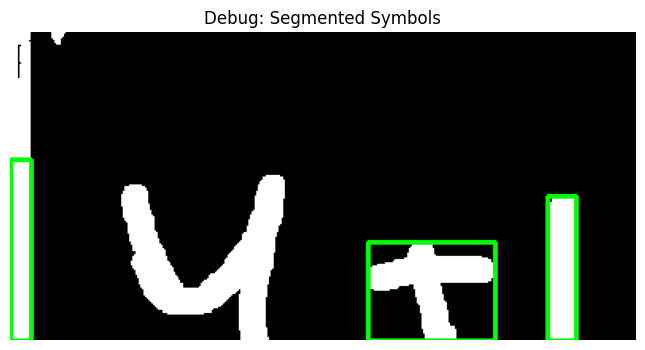

Predicted Symbol: x
Predicted Symbol: 3
Predicted Symbol: x
Equation: x3x
Result: x3x=3


In [5]:
import cv2
import numpy as np
from keras.models import load_model
import tkinter as tk
from tkinter import Canvas
from PIL import ImageGrab

# Load model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Label map
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

# Evaluation-safe map
eval_map = {'+': '+', '-': '-', '*': '*', '/': '/'}

# Function to preprocess canvas image
def preprocess_canvas_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 15, 10)


    # Morph to make lines bolder
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    return dilated


# Segment symbols from thresholded image
import cv2
import numpy as np
from PIL import Image, ImageOps
from io import BytesIO
import base64
import matplotlib.pyplot as plt
# Helper to pad and resize a cropped symbol
def pad_and_resize(symbol_img, size=(64, 64)):
    h, w = symbol_img.shape
    max_dim = max(h, w)

    # Create a square black canvas
    square = np.zeros((max_dim, max_dim), dtype=np.uint8)

    # Center the symbol on the square
    x_offset = (max_dim - w) // 2
    y_offset = (max_dim - h) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = symbol_img

    # Resize to model input shape
    resized = cv2.resize(square, size, interpolation=cv2.INTER_AREA)

    return resized


def segment_symbols_from_array(thresh):
    symbol_images = []
    bounding_boxes = []

    y_crop_offset = 80  # How much we skip from top
    canvas_only = thresh[y_crop_offset:, :]  # Crop only below the top noise

    contours, _ = cv2.findContours(canvas_only.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        y += y_crop_offset  # shift back to original image coords
        area = w * h
        aspect = w / h
        if 100 < area < 10000 and 0.1 < aspect < 6 and w > 10 and h > 10:
            bounding_boxes.append((x, y, w, h))

    bounding_boxes = sorted(bounding_boxes, key=lambda box: box[0])

    # Debug view
    debug_img = cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in bounding_boxes:
        cv2.rectangle(debug_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.figure(figsize=(10, 4))
    plt.imshow(debug_img)
    plt.title("Debug: Segmented Symbols")
    plt.axis('off')
    plt.show()

    # Crop and resize
    for (x, y, w, h) in bounding_boxes:
        symbol = thresh[y:y+h, x:x+w]  # From original thresh, using corrected Y
        symbol_resized = pad_and_resize(symbol)
        symbol_images.append(symbol_resized)

    return symbol_images



# Predict symbols
def predict_symbols(images):
    predictions = []
    for img in images:
        img = img.astype("float32") / 255.0  # Normalize
        img = np.expand_dims(img, axis=-1)   # Add channel dimension: (64, 64, 1)
        img = np.expand_dims(img, axis=0)    # Add batch dimension: (1, 64, 64, 1)

        pred = model.predict(img, verbose=0)
        class_idx = np.argmax(pred)
        symbol = label_map[class_idx]
        print(f"Predicted Symbol: {symbol}")
        predictions.append(symbol)

    return predictions

# Evaluate final result
def evaluate_equation(pred_list):
    try:
        eq = ''.join(pred_list).replace('=', '')
        # Only keep valid characters for eval
        eq_clean = ''.join([c for c in eq if c in '0123456789+-*/'])
        result = eval(eq_clean)
        return eq + "=" + str(result)
    except:
        return "Invalid Equation"

# Canvas setup
last_x, last_y = None, None

def draw(event):
    global last_x, last_y
    x, y = event.x, event.y
    if last_x and last_y:
        canvas.create_line((last_x, last_y, x, y), width=12, fill='black', capstyle=tk.ROUND, smooth=True)
    last_x, last_y = x, y

def reset(event):
    global last_x, last_y
    last_x, last_y = None, None

def clear_canvas():
    canvas.delete("all")

def predict_canvas_equation():
    canvas.update()
    x = canvas.winfo_rootx()
    y = canvas.winfo_rooty()
    x1 = x + canvas.winfo_width()
    y1 = y + canvas.winfo_height()

    

    img = ImageGrab.grab().crop((x, y, x1, y1))
    img = np.array(img)

    # Use the improved preprocessing pipeline directly
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.fromarray(gray)
    img = ImageOps.invert(img)
    img = np.array(img)

    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    thresh = thresh[10:, 10:]  # crop top-left padding

    # Segmentation and Prediction
    symbols = segment_symbols_from_array(thresh)
    preds = predict_symbols(symbols)
    result = evaluate_equation(preds)

    print("Equation:", ''.join(preds))
    print("Result:", result)
    result_label.config(text=result)


# TKinter UI
root = tk.Tk()
root.title(" ")

canvas = tk.Canvas(root, width=400, height=200, bg='white')
canvas.pack()

canvas.bind('<B1-Motion>', draw)
canvas.bind('<ButtonRelease-1>', reset)

btn_predict = tk.Button(root, text="Predict Equation", command=predict_canvas_equation)
btn_predict.pack()

btn_clear = tk.Button(root, text="Clear", command=clear_canvas)
btn_clear.pack()

result_label = tk.Label(root, text="", font=("Helvetica", 16))
result_label.pack()

root.mainloop()


# After prediction




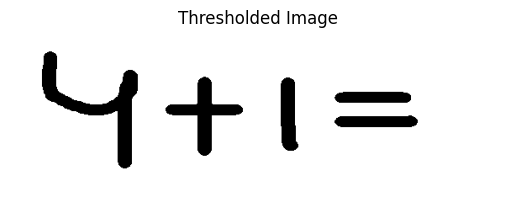

Predicted: x

Final Prediction: x
Result: Invalid Expression


In [20]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps
import base64
from io import BytesIO
import matplotlib.pyplot as plt

# Load your trained CNN model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Label map from your model
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

# Only safe math symbols
eval_map = {'+': '+', '-': '-', '*': '*', '/': '/'}

# Step 1: Preprocess image
def preprocess_image(path):
    im = cv2.imread(path, 0)
    im = cv2.resize(im, (600, 200))
    
    _, thresh = cv2.threshold(im, 127, 255, 0)
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    thresh = thresh[10:, 10:]
    
    plt.imshow(thresh, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')
    plt.show()

    return thresh

# Step 2: Segment symbols
def segment_symbols(thresh_img):
    contours, _ = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w * h > 100:
            bounding_boxes.append((x, y, w, h))

    bounding_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    symbol_images = []

    for (x, y, w, h) in bounding_boxes:
        symbol = thresh_img[y:y+h, x:x+w]
        
        side = max(w, h)
        padded = np.zeros((side, side), dtype=np.uint8)
        x_offset = (side - w) // 2
        y_offset = (side - h) // 2
        padded[y_offset:y_offset+h, x_offset:x_offset+w] = symbol

        resized = cv2.resize(padded, (64, 64))
        norm = resized / 255.0
        norm = norm.reshape(1, 64, 64, 1)
        symbol_images.append(norm)

    return symbol_images

# Step 3: Predict symbols
def predict_symbols(images):
    predictions = []
    for img in images:
        pred = model.predict(img, verbose=0)
        class_idx = np.argmax(pred)
        symbol = label_map[class_idx]
        print(f"Predicted: {symbol}")
        predictions.append(symbol)
    return predictions

# Step 4: Evaluate expression
def evaluate_equation(predictions):
    try:
        expr = ''.join(predictions).replace('=', '')
        expr_clean = ''.join([c for c in expr if c in '0123456789+-*/'])
        result = eval(expr_clean)
        return expr + "=" + str(result)
    except:
        return "Invalid Expression"

# Step 5: Full pipeline
def process_equation_image(image_path):
    thresh = preprocess_image(image_path)
    symbols = segment_symbols(thresh)
    preds = predict_symbols(symbols)
    result = evaluate_equation(preds)
    print("\nFinal Prediction:", ''.join(preds))
    print("Result:", result)

# Run the model
process_equation_image("Screenshot 2025-06-17 141358.png")


In [4]:
import numpy as np
print(np.__version__)


1.24.4


In [8]:
from keras.models import load_model

model = load_model("symbol_classifier_model.h5")
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 58, 58, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 128)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 27, 27, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                  

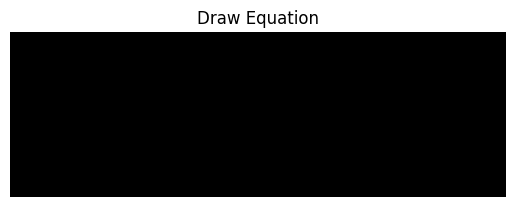

Predicted equation: 


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageOps
from keras.models import load_model

# Load your trained model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Your label map
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

# Drawing Canvas
canvas = np.ones((200, 600), dtype=np.uint8) * 255  # White canvas

fig, ax = plt.subplots()
ax.imshow(canvas, cmap='gray')
ax.set_title("Draw Equation")
ax.axis('off')

drawing = False
last_x, last_y = None, None

def on_press(event):
    global drawing, last_x, last_y
    if event.inaxes:
        drawing = True
        last_x, last_y = int(event.xdata), int(event.ydata)

def on_move(event):
    global last_x, last_y
    if drawing and event.inaxes:
        x, y = int(event.xdata), int(event.ydata)
        ax.plot([last_x, x], [last_y, y], color='black', linewidth=6)
        last_x, last_y = x, y
        fig.canvas.draw()

def on_release(event):
    global drawing
    drawing = False

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_release_event', on_release)

plt.show()

# ---- Capture Drawing ----
fig.canvas.draw()
canvas_img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
canvas_img = canvas_img.reshape(fig.canvas.get_width_height()[::-1] + (4,))  # Includes alpha channel
canvas_img = canvas_img[:, :, :3]  # Drop alpha to keep RGB

gray = cv2.cvtColor(canvas_img, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# ---- Pad & Resize Function ----
def pad_and_resize(symbol_img, size=(64, 64)):
    h, w = symbol_img.shape
    max_dim = max(h, w)
    square = np.zeros((max_dim, max_dim), dtype=np.uint8)
    x_offset = (max_dim - w) // 2
    y_offset = (max_dim - h) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = symbol_img
    return cv2.resize(square, size, interpolation=cv2.INTER_AREA)

# ---- Segment & Predict ----
def segment_and_predict(thresh):
    symbols = []
    boxes = []

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        area = w * h
        aspect = w / h
        if 300 < area < 10000 and 0.2 < aspect < 5:
            boxes.append((x, y, w, h))

    boxes = sorted(boxes, key=lambda b: b[0])

    for (x, y, w, h) in boxes:
        symbol = thresh[y:y+h, x:x+w]
        symbol = pad_and_resize(symbol)
        symbol = symbol.astype('float32') / 255.0
        symbol = np.expand_dims(symbol, axis=(0, -1))  # Shape: (1, 64, 64, 1)
        pred = model.predict(symbol, verbose=0)
        class_idx = np.argmax(pred)
        symbols.append(label_map[class_idx])

    return symbols

# Predict and show result
predicted = segment_and_predict(thresh)
print("Predicted equation:", ''.join(predicted))


In [2]:
%pip install ipycanvas


  Using cached ipycanvas-0.13.3-py2.py3-none-any.whl.metadata (6.3 kB)
Using cached ipycanvas-0.13.3-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


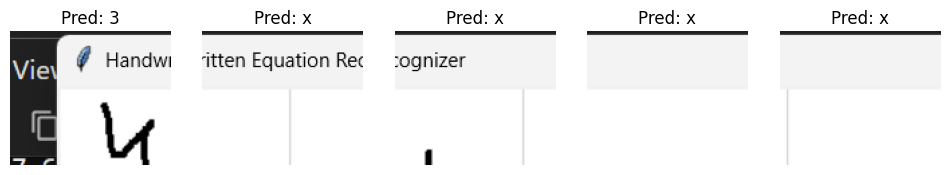

Predicted Equation: 3
Evaluated Result: 3


In [3]:
import cv2
import numpy as np
from keras.models import load_model
import tkinter as tk
from tkinter import Canvas, Button
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt

# Load your trained CNN model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Label map
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

# Padding and resizing each cropped box
def pad_and_resize(img, size=(64, 64)):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    h, w = img.shape
    max_dim = max(h, w)
    square = np.zeros((max_dim, max_dim), dtype=np.uint8)
    x_offset = (max_dim - w) // 2
    y_offset = (max_dim - h) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = img
    return cv2.resize(square, size, interpolation=cv2.INTER_AREA).reshape(1, 64, 64, 1) / 255.0

# Prediction function
def predict_equation():
    x = root.winfo_rootx() + canvas.winfo_x()
    y = root.winfo_rooty() + canvas.winfo_y()
    x1 = x + canvas_width
    y1 = y + canvas_height

    img = ImageGrab.grab().crop((x, y, x1, y1)).convert("RGB")
    img_np = np.array(img)

    num_slots = 5
    slot_width = canvas_width // num_slots
    predictions = []
    debug_fig, axs = plt.subplots(1, num_slots, figsize=(12, 3))

    for i in range(num_slots):
        x_start = i * slot_width
        x_end = (i + 1) * slot_width
        symbol_img = img_np[:, x_start:x_end]
        processed = pad_and_resize(symbol_img)
        pred = model.predict(processed, verbose=0)
        class_idx = np.argmax(pred)
        predictions.append(label_map[class_idx])

        axs[i].imshow(symbol_img)
        axs[i].set_title(f"Pred: {label_map[class_idx]}")
        axs[i].axis('off')

    plt.show()

    expression = "".join([p if p in "0123456789+-*/" else "" for p in predictions])
    print("Predicted Equation:", expression)
    try:
        print("Evaluated Result:", eval(expression))
    except:
        print("⚠️ Error evaluating:", expression)

# Clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw_slots()

# Create slot guides
def draw_slots():
    slot_w = canvas_width // 5
    for i in range(1, 5):
        canvas.create_line(i * slot_w, 0, i * slot_w, canvas_height, fill="lightgray")

# Setup GUI
root = tk.Tk()
root.title("Handwritten Equation Recognizer")

canvas_width = 600
canvas_height = 100
canvas = Canvas(root, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

draw_slots()

# Mouse drawing
def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

last_x, last_y = None, None
def draw(event):
    global last_x, last_y
    canvas.create_line(last_x, last_y, event.x, event.y, width=4, fill='black', capstyle=tk.ROUND, smooth=True)
    last_x, last_y = event.x, event.y


canvas.bind('<Button-1>', start_draw)
canvas.bind('<B1-Motion>', draw)

Button(root, text="Predict", command=predict_equation).pack(pady=5)
Button(root, text="Clear", command=clear_canvas).pack(pady=5)

root.mainloop()


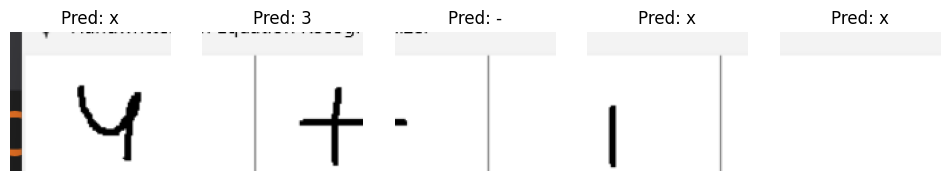

Predicted Equation: 3-
⚠️ Error evaluating: 3- 
Reason: invalid syntax (<string>, line 1)


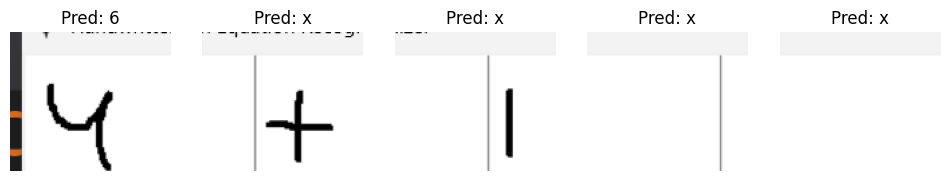

Predicted Equation: 6
Evaluated Result: 6


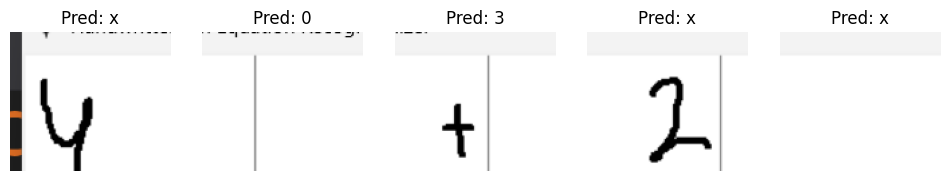

Predicted Equation: 03
⚠️ Error evaluating: 03 
Reason: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)


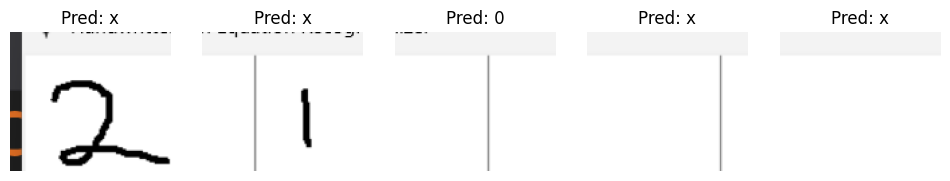

Predicted Equation: 0
Evaluated Result: 0


In [18]:
import cv2
import numpy as np
from keras.models import load_model
import tkinter as tk
from tkinter import Canvas, Button
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt

# Load trained model
model = load_model("D:/JupyterNotebook/DigitRecognizer/symbol_classifier_model.h5")

# Label map
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '=',
    15: 'x', 16: 'y'
}

# Pad and resize for prediction
def pad_and_resize(img, size=(64, 64)):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        cropped = thresh[y:y+h, x:x+w]
    else:
        cropped = thresh

    h, w = cropped.shape
    max_dim = max(h, w)
    square = np.zeros((max_dim, max_dim), dtype=np.uint8)
    x_offset = (max_dim - w) // 2
    y_offset = (max_dim - h) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = cropped

    resized = cv2.resize(square, size, interpolation=cv2.INTER_AREA)
    return resized.reshape(1, 64, 64, 1) / 255.0

# Prediction logic
def predict_equation():
    # Get canvas position on screen
    canvas.update()
    x = root.winfo_rootx() + canvas.winfo_x()
    y = root.winfo_rooty() + canvas.winfo_y()
    w = canvas.winfo_width()
    h = canvas.winfo_height()

    # Grab only the canvas area
    img = ImageGrab.grab(bbox=(x, y, x + w, y + h)).convert("RGB")
    img_np = np.array(img)

    num_slots = 5
    slot_width = w // num_slots
    predictions = []

    fig, axs = plt.subplots(1, num_slots, figsize=(12, 3))

    for i in range(num_slots):
        x_start = i * slot_width
        x_end = (i + 1) * slot_width
        symbol_img = img_np[:, x_start:x_end]

        processed = pad_and_resize(symbol_img)
        pred = model.predict(processed, verbose=0)
        class_idx = np.argmax(pred)
        predictions.append(label_map[class_idx])

        axs[i].imshow(symbol_img)
        axs[i].set_title(f"Pred: {label_map[class_idx]}")
        axs[i].axis('off')

    plt.show()

    # Create final expression
    expression = "".join([p if p in "0123456789+-*/" else "" for p in predictions])
    print("Predicted Equation:", expression)

    try:
        print("Evaluated Result:", eval(expression))
    except Exception as e:
        print("⚠️ Error evaluating:", expression, "\nReason:", str(e))


# Canvas utilities
def clear_canvas():
    canvas.delete("all")
    draw_slots()

def draw_slots():
    slot_w = canvas_width // 5
    for i in range(1, 5):
        canvas.create_line(i * slot_w, 0, i * slot_w, canvas_height, fill="gray", width = 1)

# GUI setup
root = tk.Tk()
root.title("Handwritten Equation Recognizer")

canvas_width = 600
canvas_height = 100
canvas = Canvas(root, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

draw_slots()

def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

def draw(event):
    global last_x, last_y
    canvas.create_line(last_x, last_y, event.x, event.y, width=4, fill='black', capstyle=tk.ROUND, smooth=True)
    last_x, last_y = event.x, event.y

canvas.bind('<Button-1>', start_draw)
canvas.bind('<B1-Motion>', draw)

Button(root, text="Predict", command=predict_equation).pack(pady=5)
Button(root, text="Clear", command=clear_canvas).pack(pady=5)

root.mainloop()


In [19]:
import os
import cv2
import numpy as np
from PIL import Image, ImageFont, ImageDraw

# Set of characters
CHARACTERS = "0123456789+-*/=xy"

# Folder to save data
os.makedirs("equation_images", exist_ok=True)

# Use a basic font
font_path = "arial.ttf"  # Make sure this exists or replace with path to any .ttf
font_size = 50
font = ImageFont.truetype(font_path, font_size)

# Generate synthetic equation images
samples = ["3+4=7", "2*x=4", "10-3=7", "x+y=2", "9/3=3", "5*y=15"]
for idx, eq in enumerate(samples):
    img = Image.new('L', (300, 80), color=255)  # white background
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), eq, font=font, fill=0)  # black text

    # Save image and label
    img_np = np.array(img)
    cv2.imwrite(f"equation_images/{idx}_{eq}.png", img_np)


In [20]:
from PIL import Image

# Load one sample image
img = Image.open("equation_images/0_3+4=7.png")

# Get size
print("Image size:", img.size)  # (width, height)


Image size: (300, 80)
